In [1]:
%pylab inline

from rayopt import *

Populating the interactive namespace from numpy and matplotlib


/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:307: RuntimeWarning: divide by zero encountered in double_scalars
  yield "petzval radius: %.5g" % (1/self.petzval_curvature)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:254: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:259: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2


System: Hubble Space Telescope f/24
Scale: 1.0 mm
Wavelengths: 633 nm
Object:
 Index: 1
 Entrance: 2.4e+03 dia at 5e+03
 Pupil: 2.4e+03 dia at 1e+04
 Semi-Angle: 0.0278
Image:
 Index: 1
 Entrance: 300 dia at 6.41e+03
 Pupil: 559 dia at 1.34e+04
 Radius: 27.9
 NA: 0.0208
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf       2400      basic/vacuum   1.000   1.000     inf
 1 S       5000 -1.104e+04       2400      basic/mirror   1.000   1.000     inf
 2 S     4906.1       1358        300      basic/mirror   1.000   1.000     inf
 3 S     6406.3        inf      55.85              None     nan     nan     nan
lagrange: 0.58178
track length: 4906.1
object, image height: [  2.42406869  27.92547714]
petzval radius: inf
front, back focal length (from PP): [-57598.96729776  57598.96729776]
entry, exit pupil height: [ 1200.           145.88889812]
entry, exit pupil distance: [  -0.         -596.45119848]
front, back foca

/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: divide by zero encountered in true_divide
  xd = (a[1] - h)/h


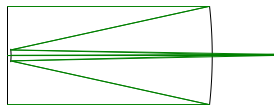

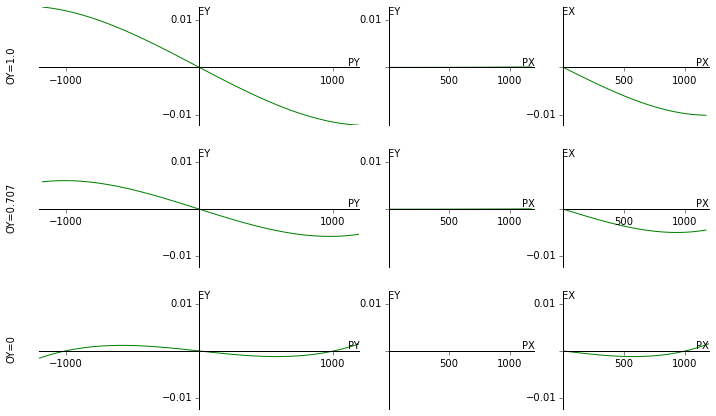

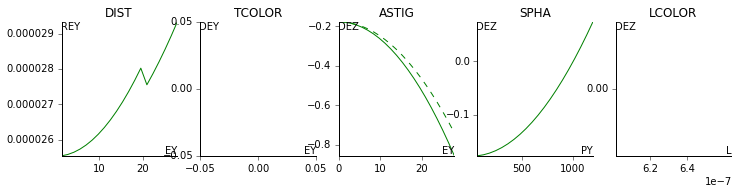

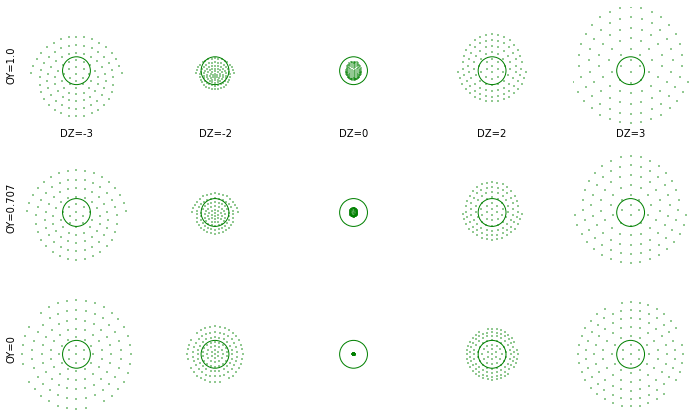

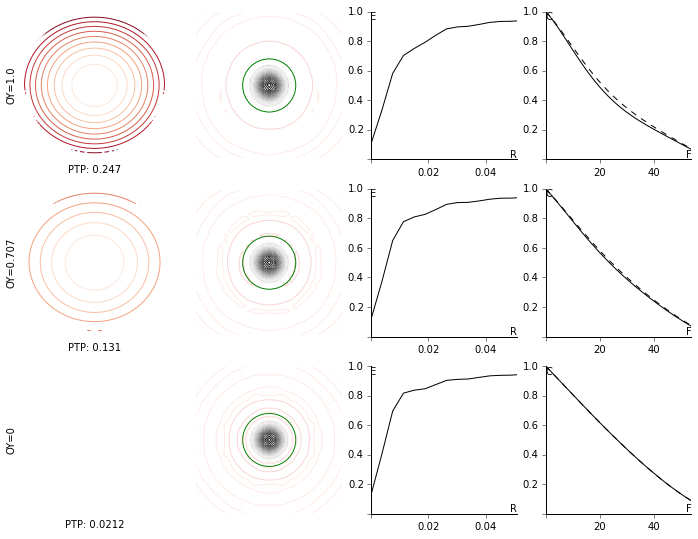

In [2]:
s = System(description="Hubble Space Telescope f/24")
s.wavelengths = [632.8e-9]
s.object = InfiniteConjugate(angle_deg=100/60**2)
start = Spheroid(radius=1200., material=vacuum)
m1 = Spheroid(roc=-11040., conic=-1.002299, radius=1200.,
              distance=5e3, material=mirror)
# as built:
# m1.conic = -1.0013236
m2 = Spheroid(roc=1358., conic=-1.496, radius=150.,
              distance=-4906.072, material=mirror)
end = Spheroid(roc=np.inf*-640., distance=1500 + m2.distance)
s.extend([start, m1, m2, end])

Analysis(s)